1/1 [==============================] - 1s 652ms/step
D


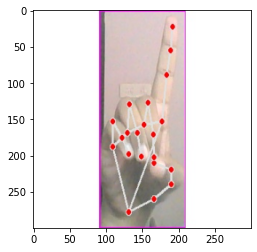

In [1]:
import numpy as np
import keras.utils as ku
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model

model = load_model("Final_Model/ASL_Recog_model.h5")
def Recog(path):
    # img = Image.open(path)
    # npr = np.array(img)
    # temp=np.array([255,255,255])
    # for i in range(300):
    #     for j in range(300):
    #         if npr[i][j][0]<220 and npr[i][j][1]<220 and npr[i][j][2]<220:
    #             npr[i][j]=temp
    # idata = Image.fromarray(npr)
    # idata.save("tut.jpg")
    # path="tut.jpg"
    
    # Loading Image
    img = ku.load_img(path, target_size=(300,300))
    # Normalizing Image
    norm_img = ku.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    imgplot = plt.imshow(img)
    # Getting Predictions
    pred = model.predict(input_arr_img)
    # Printing Model Prediction
    l=list(pred[0])
    return l
    
# Path for the image to get predictions  
path = "C:/Users/User/OneDrive/Desktop/Miniprj/Data_Images/D/image_30.jpg"
ans = Recog(path)
print(chr(65+ans.index(max(ans))))

In [2]:
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.preprocessing import image

In [3]:
path="C:/Users/User/OneDrive/Desktop/Miniprj/All_Images/Test"

1/1 [==============================] - 0s 110ms/step
96.53846153846153


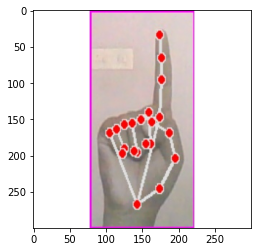

In [4]:
wrg=0
for i in range(65,91):
    for j in range(30):
        p = f"{path}/{chr(i)}/{chr(i)}_{j}.jpg"
        ans = Recog(p)
        if chr(i)!=chr(65+ans.index(max(ans))):
            wrg+=1
print(100-((wrg/780)*100))

1/1 [==============================] - 0s 115ms/step


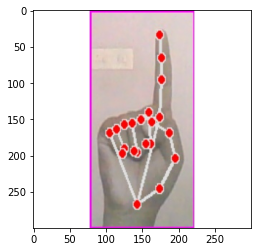

In [5]:
y_pred=[]
for i in range(65,91):
    for j in range(30):
        p = f"{path}/{chr(i)}/{chr(i)}_{j}.jpg"
        ans = Recog(p)
        y_pred.append(chr(65+ans.index(max(ans))))

y_act=[]
for i in range(65,91):
    for _ in range(30):
        y_act.append(chr(i))

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
cm = confusion_matrix(y_act,y_pred)

In [8]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as pt

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

Text(0.5, 0.98, 'Plot of confusion matrix')

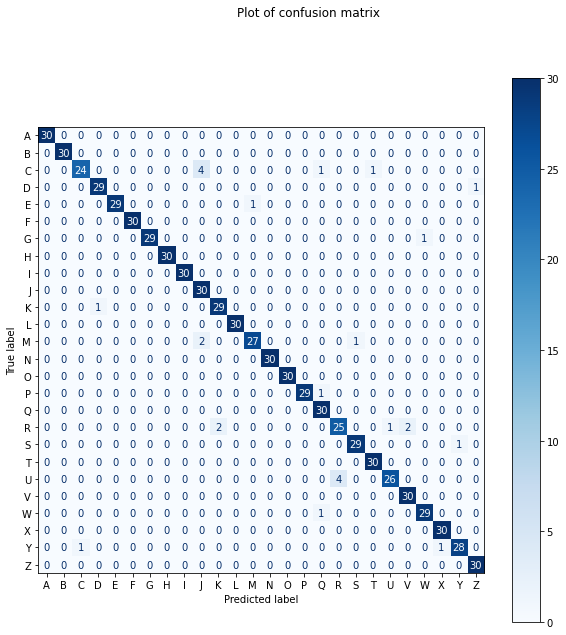

In [10]:
disp = cmd.from_predictions(
                            y_act, 
                            y_pred, 
                            display_labels=[chr(i) for i in range(65,91)], 
                            cmap=pt.cm.Blues
                            ) 
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 
fig.suptitle('Plot of confusion matrix')

In [11]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("recall:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# print("true neg rate:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
# print("Neg pred value:",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out:",FPR)
# False negative rate
FNR = FN/(TP+FN)
# print("False neg rate;",FNR)
# False discovery rate
FDR = FP/(TP+FP)
# print("False discovery rate:",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",ACC)

recall: [1.         1.         0.8        0.96666667 0.96666667 1.
 0.96666667 1.         1.         1.         0.96666667 1.
 0.9        1.         1.         0.96666667 1.         0.83333333
 0.96666667 1.         0.86666667 1.         0.96666667 1.
 0.93333333 1.        ]
Precision: [1.         1.         0.96       0.96666667 1.         1.
 1.         1.         1.         0.83333333 0.93548387 1.
 0.96428571 1.         1.         1.         0.90909091 0.86206897
 0.96666667 0.96774194 0.96296296 0.9375     0.96666667 0.96774194
 0.96551724 0.96774194]
Fall out: [0.         0.         0.00133333 0.00133333 0.         0.
 0.         0.         0.         0.008      0.00266667 0.
 0.00133333 0.         0.         0.         0.004      0.00533333
 0.00133333 0.00133333 0.00133333 0.00266667 0.00133333 0.00133333
 0.00133333 0.00133333]
Accuracy: [1.         1.         0.99102564 0.9974359  0.99871795 1.
 0.99871795 1.         1.         0.99230769 0.99615385 1.
 0.99487179 1.         